<a href="https://colab.research.google.com/github/gccianmario/Online-learning-application-projects/blob/main/Ola_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dictionary

# Auxiliary functions

In [ ]:
import numpy as np
from random import randint

In [ ]:
# it return a random list of probabilities that sum to 1-padding
def get_probabilities(quantity, padding = 0.5):
  if int(quantity) <= 0 :
    raise Exception("quantity Value Error")
  if float(padding) < 0  or float(padding) >= 1:
    raise Exception("padding Value Error")
  
  probabilities = []
  random_samples = np.array([0] * quantity)

  for i in range(quantity):
    random_samples[i] = float(randint(1, 100))
  
  normalizer = (1 - padding) / np.sum(random_samples)

  for i in range(quantity):
    probabilities.append(random_samples[i] * normalizer)

  # add numerical noise to first element to try to ensure sum to 1-padding
  probabilities[0] = probabilities[0] + ((1-padding) - np.sum(probabilities))
  
  return probabilities

#Graph implementation

Graph is fully connected and therefore all the edges have strictly positive probabilities (in practice the secondary products displayed are just two and thus many of the edges are useless). In the second, assume that the graph is not fully connected and therefore some edges have zero probability. 

The behavior of the user in the graph is similar to that of the social influence. Thus, in the following project proposals, you need to resort to social influence techniques to evaluate the probabilities with which the user reaches the webpage with some specific primary product


In [ ]:
class Graph:
  def __init__(self, max_size):
    self.graph = {}
    self.n_nodes = 0
    self.max_size = max_size

    if int(max_size) <= 0:
      raise Exception("n_nodes Value Error")

  
  # Add an edge to the graph  src: [(dest, weight)...]
  def add_edge(self, src, dest, weight):
    if not isinstance(src, Product):
      raise Exception("source of edge Value Error")
    if not isinstance(dest, Product):
      raise Exception("destination of edge Value Error")

    self.graph[src].append((dest, weight))
  
  # Add a node to the graph
  def add_node(self, item):
    if not isinstance(item, Product):
      raise Exception("item is not a product Value Error")
    if(item in self.graph):
      print("Item already in the graph")
      return
    
    self.graph[item] = list()
    self.n_nodes = self.n_nodes + 1

  # get all child nodes given a father
  def get_child_nodes(self, father_node):
    if not isinstance(father_node, Product):
      raise Exception("node is not a product Value Error")
    if(father_node not in self.graph):
      print("No match")
      return []
    
    return self.graph[father_node]

  # Function to print adjacency list representation 
  def printGraph(self):
    for (src, node_list) in self.graph.items():
      print(f"--- node: {src} ---")
      for (node, weight) in node_list:
        print(f"\t( {src} )--[w:{weight:.3f}]-—>( {node} )")

function to generate n probabilities that sum to 1

In [ ]:
test = get_probabilities(5, padding=0.9)
print(test)
print(f"sum to: {np.sum(test)}")

[0.008176100628930816, 0.008805031446540879, 0.06289308176100628, 0.01132075471698113, 0.008805031446540879]
sum to: 0.09999999999999998


# User, Campaign, Product Class definition

In [ ]:
class Product:
  def __init__(self, id, price, secondary_list = []):
    self.id = id
    self.price = price  # correspond to margin
    self.secondary_list = secondary_list  # what to display after purchase (fixed)
  
  def __str__(self):
    return f"Product {self.id}"

  def add_secondary(self, product):
    self.secondary_list.append(product)
  

In [ ]:
class User:
  def __init__(self, id, reservation_price, lmbda, weighted_graph, alpha_function):
    self.id = id
    self.reservation_price = reservation_price
    self.lmbda = lmbda
    self.weighted_graph = weighted_graph  # pass here the full weighted graph associated with the user
    self.alpha_function = alpha_function  # list of alpha_function specifing how the user react to a specific campaign

In [ ]:
class Campaign:
  def __init__(self, id, allocated_budget, value_per_click, alpha_i_max):
    self.id = id
    self.allocated_budget = allocated_budget
    self.value_per_click = value_per_click
    self.alpha_i_max = alpha_i_max

  def change_budget(self, new_budget):
    self.allocated_budget = new_budget
  
  def alpha_i(self, user_alpha_function):
    return max(user_alpha_function(self.allocated_budget), self.alpha_i_max) # CHECK THIS POINT


# Alpha function generator and testing

this function is a generator of alpha functions based on saturation speed and value where to saturate, they are all sigmoid functions



In [ ]:
def new_alpha_function(saturation_speed = 1, max_value = 1):
  return lambda x: (-1 +  2 / (1 + np.exp(- saturation_speed * x)))*max_value

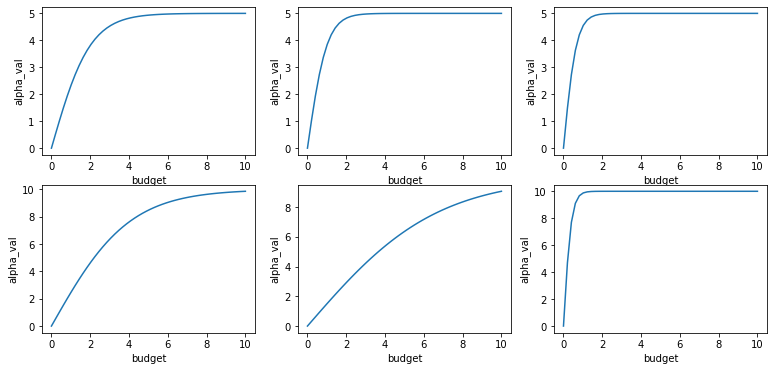

In [ ]:
import matplotlib.pyplot as plt

test_alpha = [
            new_alpha_function(saturation_speed=1, max_value=5),
            new_alpha_function(saturation_speed=2, max_value=5),
            new_alpha_function(saturation_speed=3, max_value=5),
            new_alpha_function(saturation_speed=0.5, max_value=10),
            new_alpha_function(saturation_speed=0.3, max_value=10),
            new_alpha_function(saturation_speed=5, max_value=10)  
]
img, axss = plt.subplots(nrows=2, ncols=3, figsize=((13,6)))
axs = axss.flatten()

for i in range(6):
  alpha_fun = new_alpha_function(saturation_speed=3, max_value=5)
  x = np.linspace(0,10)
  y = test_alpha[i](x) 
  axs[i].set_xlabel("budget") 
  axs[i].set_ylabel("alpha_val") 
  axs[i].plot(x,y) 
img.show()

# Test Environment

In [ ]:
prod1 = Product(1, 2.0, secondary_list=[2, 3])
prod2 = Product(2, 2.5, secondary_list=[3, 4])
prod3 = Product(3, 3.0, secondary_list=[1, 5])
prod4 = Product(4, 4.0, secondary_list=[2, 5])
prod5 = Product(5, 4.5, secondary_list=[1, 4])

products = [prod1, prod2, prod3, prod4, prod5]

Examples on how to use the graph

In [ ]:
graph = Graph(5)
# node crearion
graph.add_node(prod1)
graph.add_node(prod2)
graph.add_node(prod3)
graph.add_node(prod4)
graph.add_node(prod5)

graph.printGraph()
print("\n")

# edge creation
graph.add_edge(prod1, prod5, 3)
graph.add_edge(prod1, prod2, 3)

graph.add_edge(prod2, prod4, 3)
graph.add_edge(prod2, prod3, 3)

graph.add_edge(prod3, prod1, 3)
graph.add_edge(prod3, prod5, 3)

graph.printGraph()

# child retrival
print("\nchilds of node 1:")
result = graph.get_child_nodes(prod1)
print([f"{node} weight:{weight}" for (node, weight) in result])

--- node: Product 1 ---
--- node: Product 2 ---
--- node: Product 3 ---
--- node: Product 4 ---
--- node: Product 5 ---


--- node: Product 1 ---
	( Product 1 )--[w:3.000]-—>( Product 5 )
	( Product 1 )--[w:3.000]-—>( Product 2 )
--- node: Product 2 ---
	( Product 2 )--[w:3.000]-—>( Product 4 )
	( Product 2 )--[w:3.000]-—>( Product 3 )
--- node: Product 3 ---
	( Product 3 )--[w:3.000]-—>( Product 1 )
	( Product 3 )--[w:3.000]-—>( Product 5 )
--- node: Product 4 ---
--- node: Product 5 ---

childs of node 1:
['Product 5 weight:3', 'Product 2 weight:3']
